In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


In [ ]:
DATA_BASE = "tc-hard/dataset/ds.hard-splits/pep+cdr3b"

NEW_DATA_BASE = "tc-hard/dataset/new_split/pep+cdr3b"


In [3]:
validation_ratio = 0.2


In [4]:
def make_df(df_path):
    df = pd.read_csv(df_path, usecols = ["cdr3.beta", "antigen.epitope", "label"])

    map_keys = {
    'cdr3.beta': 'tcrb',
    'antigen.epitope': 'peptide',
    "label": "label"
    }
    df = df.rename(columns={c: map_keys[c] for c in df.columns})

    df['tcrb'] = df['tcrb'].str.replace('O','X')
    df['peptide'] = df['peptide'].str.replace('O','X')

    return df



In [5]:
def draw_bar(train_num, validation_num, test_num, split_id):

    labels = ["train", "validation", "test"]
    bars = plt.bar(labels, [train_num, validation_num, test_num])

    plt.title(f'Samples Distribution in split {split_id}')
    plt.xlabel('Categories')
    plt.ylabel('Values')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.show()

def check_unseen(train, validation):
    peptide_train = set(train['peptide'])
    peptide_validation = set(validation['peptide'])
    print("num of unseen peptides in validation set: ", len(peptide_validation - peptide_train))
    print("num of unseen peptides in train set: ", len(peptide_train - peptide_validation))
    print("num of common peptides in train and validation set: ", len(peptide_train & peptide_validation))


In [6]:
def validation_split(neg_generate_mode, split_id):
    train_df_path = os.path.join(DATA_BASE, "train", neg_generate_mode, f"train-{split_id}.csv")

    test_df_path = os.path.join(DATA_BASE, "test", neg_generate_mode, f"test-{split_id}.csv")
    
    train_df = make_df(train_df_path)
    test_df = make_df(test_df_path)
    
    num_samples = train_df.shape[0]
    num_validation = int(num_samples * validation_ratio)

    from collections import Counter
    peptide_count = Counter(train_df['peptide'])
    peptide_count_len = len(peptide_count)
    peptide_perm = np.random.RandomState(seed=42).permutation(peptide_count_len)

    c = 0
    selected_peptide = []
    for i in peptide_perm:
        selected_peptide.append(peptide_count.most_common()[i][0])
        c += peptide_count.most_common()[i][1]
        if c > num_validation:
            break

    new_train_df = train_df[~train_df['peptide'].isin(selected_peptide)]
    validation_df = train_df[train_df['peptide'].isin(selected_peptide)]

    check_unseen(new_train_df, validation_df)
    draw_bar(train_df.shape[0], validation_df.shape[0], test_df.shape[0], split_id)
    

    return new_train_df, validation_df, test_df


num of unseen peptides in validation set:  525
num of unseen peptides in train set:  816
num of common peptides in train and validation set:  0


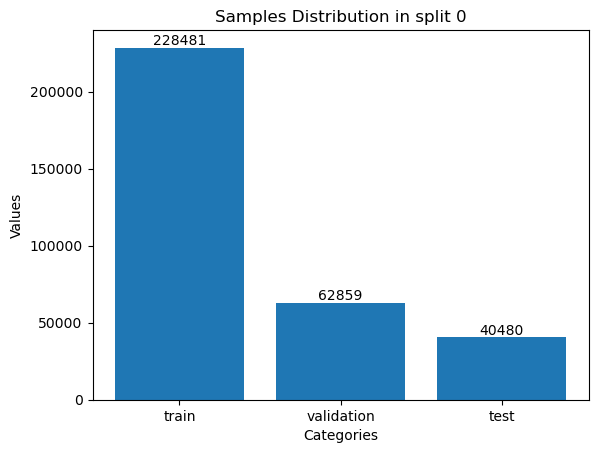

num of unseen peptides in validation set:  521
num of unseen peptides in train set:  813
num of common peptides in train and validation set:  0


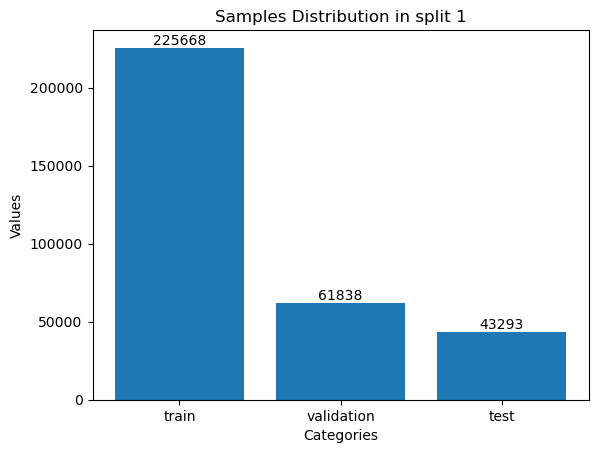

num of unseen peptides in validation set:  521
num of unseen peptides in train set:  813
num of common peptides in train and validation set:  0


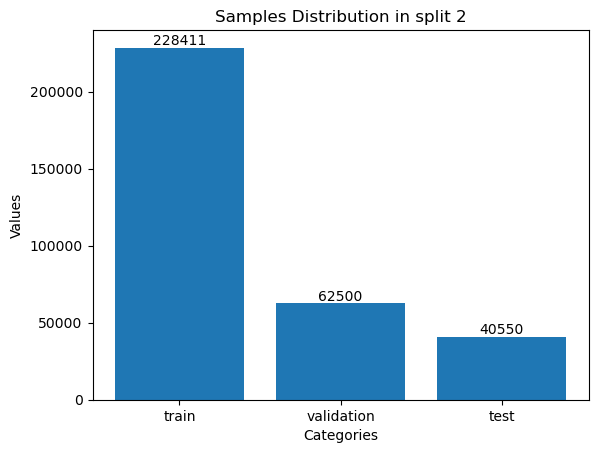

num of unseen peptides in validation set:  521
num of unseen peptides in train set:  816
num of common peptides in train and validation set:  0


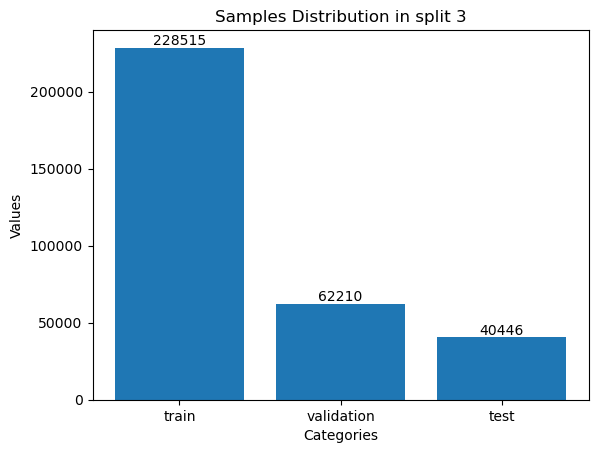

num of unseen peptides in validation set:  524
num of unseen peptides in train set:  815
num of common peptides in train and validation set:  0


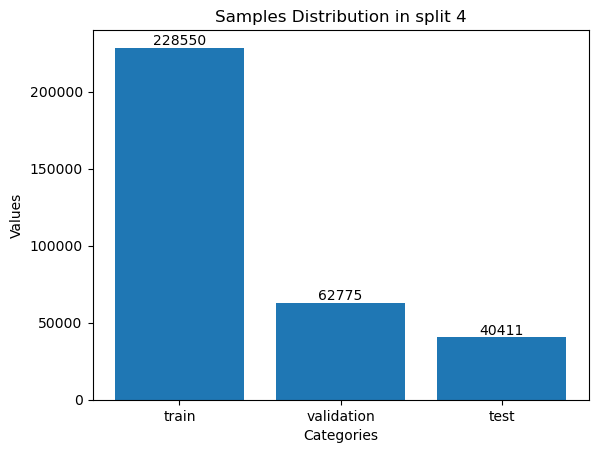

num of unseen peptides in validation set:  468
num of unseen peptides in train set:  860
num of common peptides in train and validation set:  0


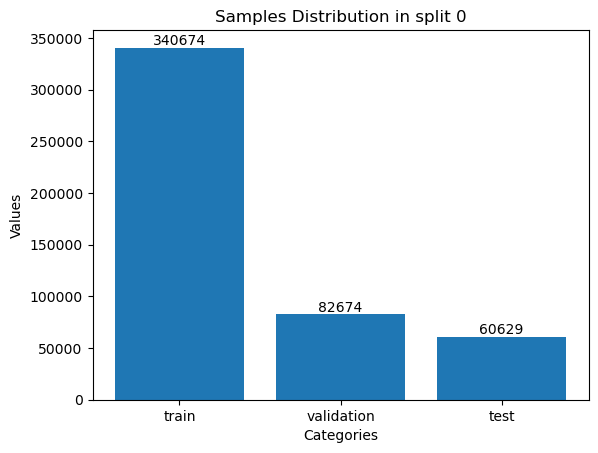

num of unseen peptides in validation set:  458
num of unseen peptides in train set:  874
num of common peptides in train and validation set:  0


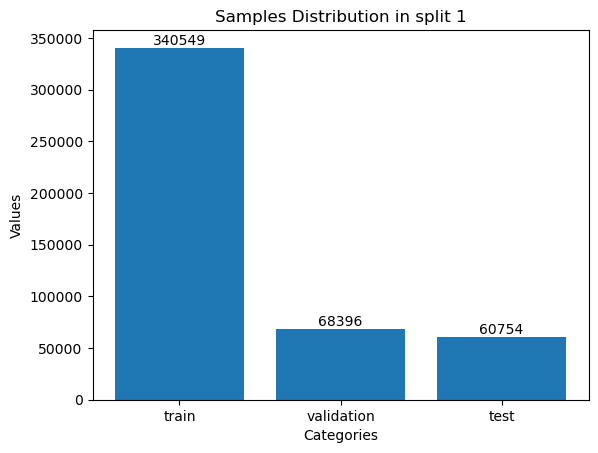

num of unseen peptides in validation set:  459
num of unseen peptides in train set:  877
num of common peptides in train and validation set:  0


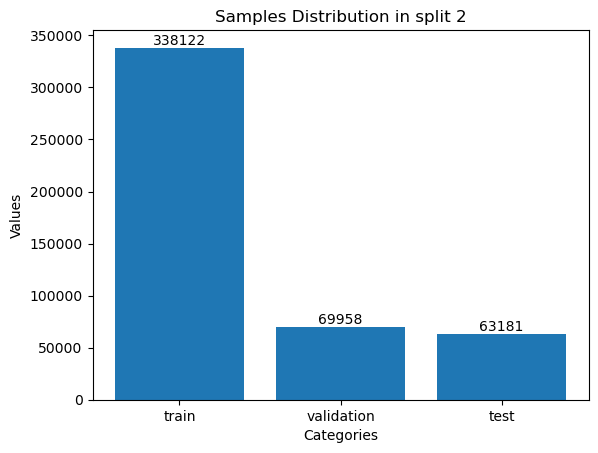

num of unseen peptides in validation set:  459
num of unseen peptides in train set:  876
num of common peptides in train and validation set:  0


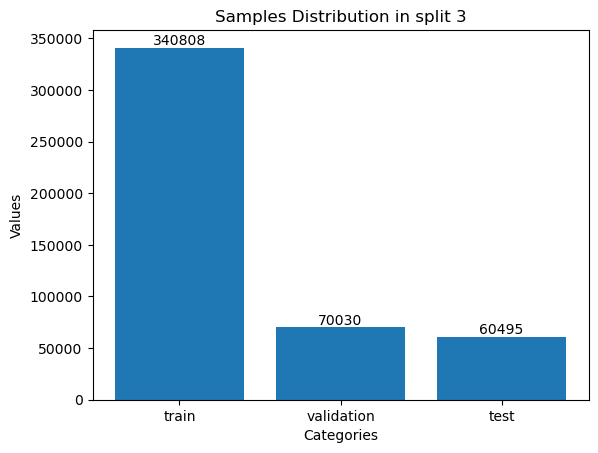

num of unseen peptides in validation set:  459
num of unseen peptides in train set:  874
num of common peptides in train and validation set:  0


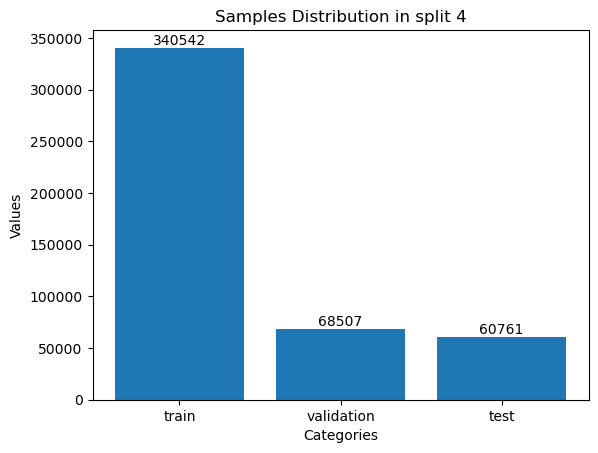

In [7]:
for neg_generate_mode in ["only-neg-assays", "only-sampled-negs"]:
    for split_id in range(5):
        train_df, validation_df, test_df = validation_split(neg_generate_mode, split_id)
        
        new_train_df_path = os.path.join(NEW_DATA_BASE, "train", neg_generate_mode, f"train-{split_id}.csv")
        validation_df_path = os.path.join(NEW_DATA_BASE, "validation", neg_generate_mode, f"validation-{split_id}.csv")
        test_df_path = os.path.join(NEW_DATA_BASE, "test", neg_generate_mode, f"test-{split_id}.csv")

        train_df.to_csv(new_train_df_path, index=False)
        validation_df.to_csv(validation_df_path, index=False)
        test_df.to_csv(test_df_path, index=False)
